In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline

60000
10000
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


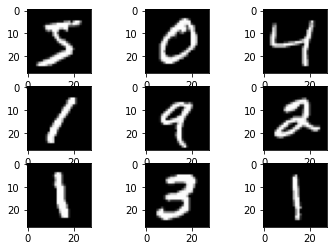

In [ ]:
(trainX,trainY), (testX,testY) = mnist.load_data()
print(len(trainX))
print(len(testX))
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

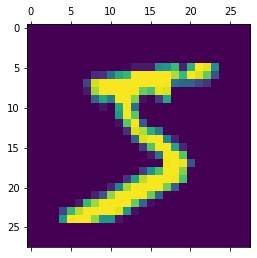

In [ ]:
#print(trainX[0])
plt.matshow(trainX[0])

In [ ]:
trainX = trainX /255
testX = testX / 255

In [ ]:
x_train_flattened = trainX.reshape(len(trainX),28*28)
print(x_train_flattened)
print(x_train_flattened[0])
print(x_train_flattened.shape)
x_test_flattened = testX.reshape(len(testX),28*28)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.    

In [ ]:
model = keras.Sequential(
    [
        # keras.layers.Input(shape = (28*28,)), #input
        # keras.layers.Dense(10,activation = 'softmax')
        keras.layers.Dense(10,input_shape=(28*28,),activation = 'sigmoid' )
    ]
)

# model.compile(optimizer = 'sgd',
#               loss = 'categorical_crossentropy',
#               metrics = ['accuracy'])

model.compile(optimizer = 'adam',                 #sgd can be used
              loss = 'sparse_categorical_crossentropy',  # but categorical_crossentropy not work with following fit
              metrics = ['accuracy'])
#print summary
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train_flattened,trainY,epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4670 - accuracy: 0.8773
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.9213
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2659 - accuracy: 0.9261
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2615 - accuracy: 0.9277
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9286
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2554 - accuracy: 0.9296
Epoch 9/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2527 - accuracy: 0.9299
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [ ]:
model.evaluate(x_test_flattened,testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9289


[0.26393216848373413, 0.9289000034332275]

313/313 [==============================] - 2s 5ms/step
[8.2565390e-04 1.5759015e-09 4.2701503e-03 9.6080041e-01 1.2347590e-03
 1.2740056e-01 2.0683726e-09 9.9985671e-01 6.7633301e-02 6.0117328e-01]
7


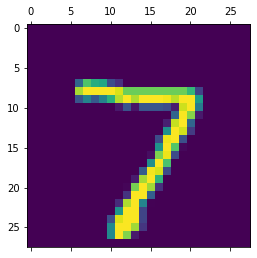

In [ ]:
plt.matshow(testX[0])
ypredict = model.predict(x_test_flattened)
print(ypredict[0])
print(testY[0])

In [ ]:
np.argmax(ypredict[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in ypredict]
print(y_predicted_labels[:5])

[7, 2, 1, 0, 4]


In [ ]:
print(testY[:5])

[7 2 1 0 4]


In [ ]:
cm = tf.math.confusion_matrix(labels= testY, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

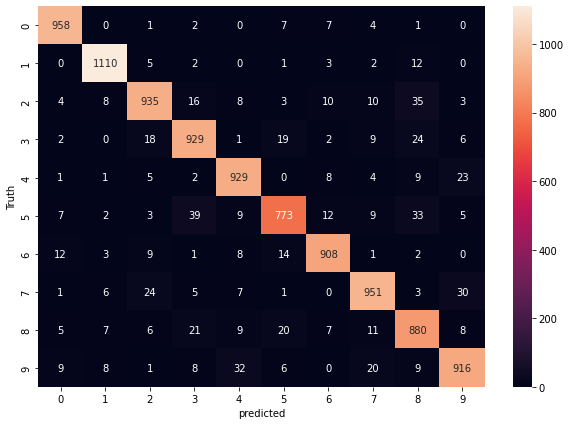

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt= 'd' )
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(100,input_shape=(28*28,),activation = 'relu' ), #without flatten use layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(10,activation = 'sigmoid' )
    ]
)

model.compile(optimizer = 'adam',                 #sgd can be used
              loss = 'sparse_categorical_crossentropy',  # but categorical_crossentropy not work with following fit
              metrics = ['accuracy'])
#print summary
model.summary()
model.fit(x_train_flattened,trainY,epochs = 5)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2726 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1223 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0857 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 5/5
1875/1875 [=====================

In [ ]:
model.evaluate(x_test_flattened,testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9767


[0.07391525059938431, 0.9767000079154968]

[7, 2, 1, 0, 4]


Text(69.0, 0.5, 'Truth')

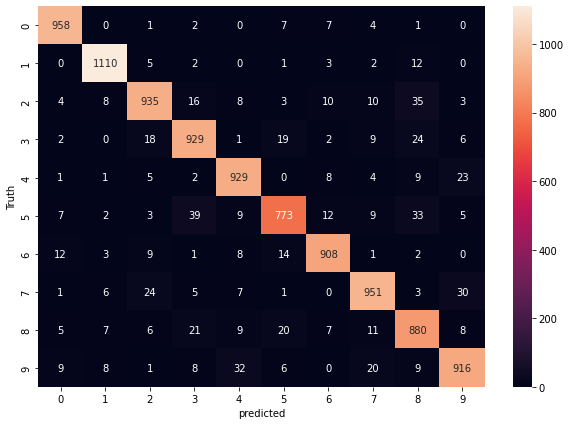

In [ ]:
y_predicted_labels = [np.argmax(i) for i in ypredict]
print(y_predicted_labels[:5])
cm = tf.math.confusion_matrix(labels= testY, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt= 'd' )
plt.xlabel('predicted')
plt.ylabel('Truth')